In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
import numpy as np

np.random.seed(1)

In [4]:
X_numpy = np.random.randn(1000, 10)
y_numpy = np.random.randint(0, 2, 1000)

X = torch.from_numpy(X_numpy).float()
y = torch.from_numpy(y_numpy).float()
y.shape

((750, 10), (250, 10), (750,), (250,))

In [3]:
torch.__version__

'2.4.0'

In [4]:
w1 = nn.Linear(in_features=10, out_features=32)
relu_1 = nn.ReLU()
w2 = nn.Linear(in_features=32, out_features=64)
relu_2 = nn.ReLU()
w3 = nn.Linear(64, 1)

In [5]:
out_w1 = w1(X)
out_relu_1 = relu_1(out_w1)
out_w2 = w2(out_relu_1)
out_relu_2 = relu_2(out_w2)
out_w3 = w3(out_relu_2)
out_w3.shape

torch.Size([1000, 1])

In [6]:
class MyFFN(nn.Module):
    def __init__(self, n_features, hidden_dim_1, hidden_dim_2, out_dim):
        super().__init__()
        self.w1 = nn.Linear(
            in_features=n_features, out_features=hidden_dim_1
        )
        self.relu_1 = nn.ReLU()
        self.w2 = nn.Linear(
            in_features=hidden_dim_1, out_features=hidden_dim_2
        )
        self.relu_2 = nn.ReLU()
        self.w3 = nn.Linear(hidden_dim_2, out_dim)

    def forward(self, x):
        x = self.w1(x)
        x = self.relu_1(x)
        x = self.w2(x)
        x = self.relu_2(x)
        x = self.w3(x)
        return x


model = MyFFN(n_features=10, hidden_dim_1=32, hidden_dim_2=64, out_dim=1)
model

MyFFN(
  (w1): Linear(in_features=10, out_features=32, bias=True)
  (relu_1): ReLU()
  (w2): Linear(in_features=32, out_features=64, bias=True)
  (relu_2): ReLU()
  (w3): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

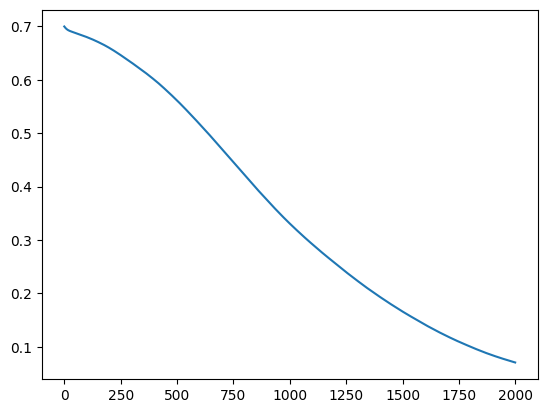

In [8]:
import matplotlib.pyplot as plt

## Entrenamiento... (Training Loop)
EPOCHS = 2000

loss_list = []
for e in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    preds = model(X)
    ## predicciones primero, y luego el target
    loss = criterion(preds, y.unsqueeze(1))
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

plt.plot(range(EPOCHS), loss_list)

In [16]:
model.w1

Linear(in_features=10, out_features=32, bias=True)

In [ ]:
model